In [1]:
import os
import numpy as np
import re
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics 
from sklearn.metrics import f1_score
import operator
import pandas as pd
import numpy as np
from scipy import optimize
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./tsla_data_file_with_sent.csv")
df

,close,open,high,low,volume,negative,neutral,positive,compound
0,1119.540,1083.00,1135.3300,1080.5000,12887738,0.000,1.000,0.000,0.0000
1,1494.100,1659.00,1794.9900,1471.1101,37309610,0.000,1.000,0.000,0.0000
2,1024.974,991.88,1027.4800,982.5000,17023324,0.000,0.943,0.057,0.2732
3,1371.000,1276.69,1377.7900,1266.0440,18885360,0.000,1.000,0.000,0.0000
4,1119.540,1083.00,1135.3300,1080.5000,12887738,0.046,0.771,0.182,0.7425
...,...,...,...,...,...,...,...,...,...
150,1009.890,969.01,1010.0000,948.5201,8732336,0.072,0.928,0.000,-0.3400
151,972.410,990.20,1018.9599,972.1100,29440376,0.000,0.927,0.073,0.3818
152,1371.000,1276.69,1377.7900,1266.0440,18885360,0.000,0.891,0.109,0.2960
153,985.980,954.27,985.9800,937.1500,8834648,0.000,1.000,0.000,0.0000


In [3]:
for i in range(155):
    new = df['close'][i] - df['open'][i]
    if new >= 0:
        df['close'][i] = 1
    else:
        df['close'][i] = 0
df['close'].astype(int)
df

<ipython-input-3-008d0a65cd7e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close'][i] = 1
<ipython-input-3-008d0a65cd7e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close'][i] = 0


,close,open,high,low,volume,negative,neutral,positive,compound
0,1.0,1083.00,1135.3300,1080.5000,12887738,0.000,1.000,0.000,0.0000
1,0.0,1659.00,1794.9900,1471.1101,37309610,0.000,1.000,0.000,0.0000
2,1.0,991.88,1027.4800,982.5000,17023324,0.000,0.943,0.057,0.2732
3,1.0,1276.69,1377.7900,1266.0440,18885360,0.000,1.000,0.000,0.0000
4,1.0,1083.00,1135.3300,1080.5000,12887738,0.046,0.771,0.182,0.7425
...,...,...,...,...,...,...,...,...,...
150,1.0,969.01,1010.0000,948.5201,8732336,0.072,0.928,0.000,-0.3400
151,0.0,990.20,1018.9599,972.1100,29440376,0.000,0.927,0.073,0.3818
152,1.0,1276.69,1377.7900,1266.0440,18885360,0.000,0.891,0.109,0.2960
153,1.0,954.27,985.9800,937.1500,8834648,0.000,1.000,0.000,0.0000


In [4]:
close_label = df['close'] 
features = df[['open', 'high', 'low','negative', 'neutral', 'positive',  'compound']] 

In [5]:
close_label

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
150    1.0
151    0.0
152    1.0
153    1.0
154    1.0
Name: close, Length: 155, dtype: float64

In [6]:
train_size = int(len(df)*.8)
df_train = df[:train_size]
df_test = df[train_size:]

df_train_x = df_train[['open', 'high', 'low', 'negative', 'neutral', 'positive', 'compound']]
df_train_y = df_train['close'] 

df_test_x = df_test[['open', 'high', 'low', 'negative', 'neutral', 'positive', 'compound']]
df_test_y = df_test['close']
df_test_y

124    1.0
125    0.0
126    1.0
127    1.0
128    1.0
129    1.0
130    1.0
131    1.0
132    1.0
133    0.0
134    1.0
135    1.0
136    1.0
137    1.0
138    1.0
139    0.0
140    0.0
141    1.0
142    1.0
143    0.0
144    1.0
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
150    1.0
151    0.0
152    1.0
153    1.0
154    1.0
Name: close, dtype: float64

In [7]:
forest = RandomForestClassifier()
forest.fit(df_train_x, df_train_y)

RandomForestClassifier()

In [8]:
print("Accuracy: " + str(round(forest.score(df_test_x, df_test_y), 4)))

Accuracy: 0.9677


In [9]:
importances = forest.feature_importances_
features = df_test_x.columns
feature_importances = pd.DataFrame(forest.feature_importances_, index = features,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
open,0.266208
low,0.242347
high,0.239825
neutral,0.082015
compound,0.081616
positive,0.055420
negative,0.032568


In [10]:
tree = DecisionTreeClassifier()

In [11]:
tree.fit(df_train_x, df_train_y)

DecisionTreeClassifier()

In [12]:
print("Accuracy: " + str(round(tree.score(df_test_x, df_test_y), 4)))

Accuracy: 1.0


In [13]:
importances = forest.feature_importances_
features = df_test_x.columns
feature_importances = pd.DataFrame(tree.feature_importances_, index = features,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
low,0.337185
open,0.293173
high,0.261806
positive,0.034560
neutral,0.030616
compound,0.021925
negative,0.020736


<BarContainer object of 7 artists>

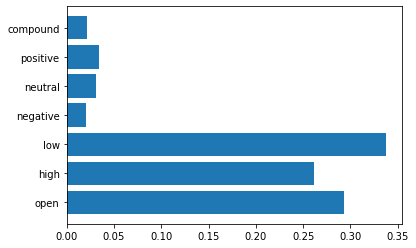

In [14]:
plt.barh(features, tree.feature_importances_)

<BarContainer object of 7 artists>

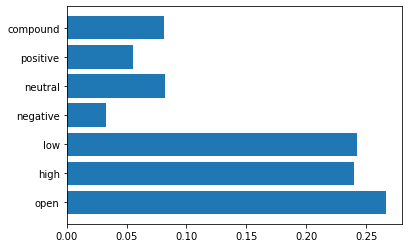

In [15]:
plt.barh(features, forest.feature_importances_)